Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

Below code allows Python to read the csv file

In [ ]:
df = pd.read_csv('/covid_19_clean_complete.csv.zip')

Shows the first 10 entries 

In [ ]:
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


We want to drop the 'Active' Column. So we apply 
a drop function in pandas.

In [ ]:
df.drop(['Active'],axis=1,inplace=True)

In [ ]:
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,Western Pacific


Using pandas we rename columns for easy readability using the rename function

In [ ]:
df.rename(columns= {'Province/State':'State','Country/Region':'Country'},inplace=True)

In [ ]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,Africa


Description of the data

In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.4+ MB


All the entries which contain null values, we want to replace those entries with the string 'NA'

In [ ]:
df.fillna('NA')

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NA,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,Eastern Mediterranean
1,NA,Albania,41.153300,20.168300,2020-01-22,0,0,0,Europe
2,NA,Algeria,28.033900,1.659600,2020-01-22,0,0,0,Africa
3,NA,Andorra,42.506300,1.521800,2020-01-22,0,0,0,Europe
4,NA,Angola,-11.202700,17.873900,2020-01-22,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,NA,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,Africa
49064,NA,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,Eastern Mediterranean
49065,NA,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,Africa
49066,NA,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.4+ MB


In [ ]:
df.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,Western Pacific


We are now grouping entries by Country using the group by function in pandas

In [ ]:
df2 = df.groupby('Country')[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [ ]:
df2

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,1936390,49098,798240
1,Albania,196702,5708,118877
2,Algeria,1179755,77972,755897
3,Andorra,94404,5423,69074
4,Angola,22662,1078,6573
...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124
183,Western Sahara,901,63,648
184,Yemen,67180,17707,23779
185,Zambia,129421,2643,83611


Now, we are grouping the data by Country and Date using the same frame work as mentioned above

In [ ]:
df2 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [ ]:
df2

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510
35152,Zimbabwe,2020-07-24,2296,32,514
35153,Zimbabwe,2020-07-25,2434,34,518
35154,Zimbabwe,2020-07-26,2512,34,518


This function below shows us all the confirmed Covid Cases > 100

In [ ]:
df3 = df2[df2['Confirmed']>100]

In [ ]:
df3

,Country,Date,Confirmed,Deaths,Recovered
65,Afghanistan,2020-03-27,110,4,2
66,Afghanistan,2020-03-28,110,4,2
67,Afghanistan,2020-03-29,120,4,2
68,Afghanistan,2020-03-30,170,4,2
69,Afghanistan,2020-03-31,174,4,5
...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510
35152,Zimbabwe,2020-07-24,2296,32,514
35153,Zimbabwe,2020-07-25,2434,34,518
35154,Zimbabwe,2020-07-26,2512,34,518


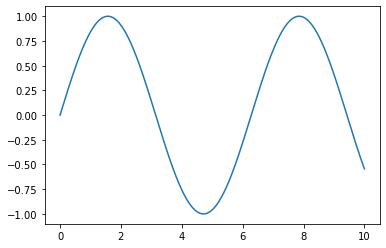

In [ ]:
x = np.linspace(0,10,1000)
y = np.sin(x)
plt.plot(x,y)

In [ ]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
65,Afghanistan,2020-03-27,110,4,2
66,Afghanistan,2020-03-28,110,4,2
67,Afghanistan,2020-03-29,120,4,2
68,Afghanistan,2020-03-30,170,4,2
69,Afghanistan,2020-03-31,174,4,5
70,Afghanistan,2020-04-01,237,4,5
71,Afghanistan,2020-04-02,273,6,10
72,Afghanistan,2020-04-03,281,6,10
73,Afghanistan,2020-04-04,299,7,10
74,Afghanistan,2020-04-05,349,7,15


This function below gives us the # of countries available to us and for them to be distinct

In [ ]:
countries = df3['Country'].unique()
len(countries)


171

Below, we are constructing a for loop to pass through each indiviual country and give us a scatter plot for the total confirmed cases, total deaths, and total recovered patients. We do this using matplotlib.pyplot to visualize the data!

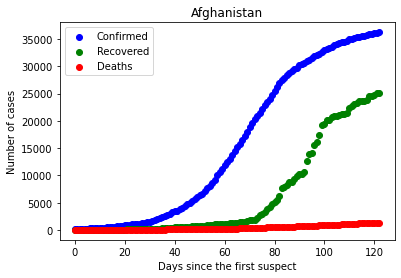

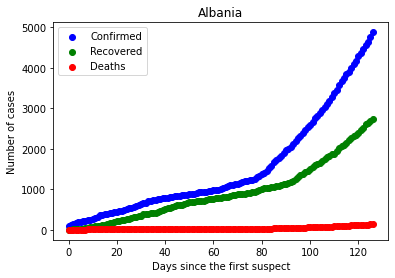

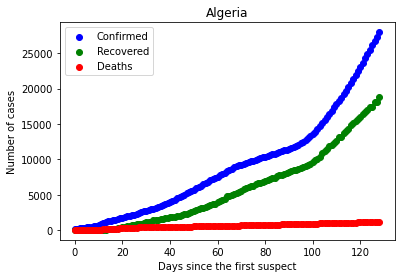

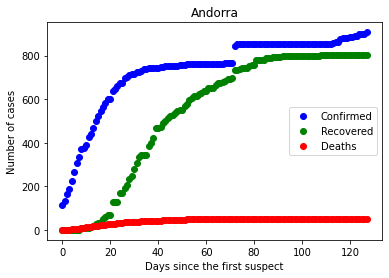

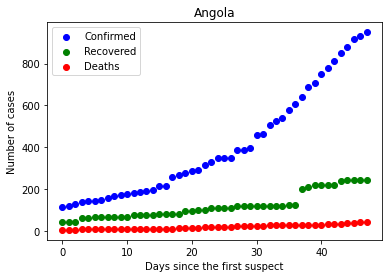

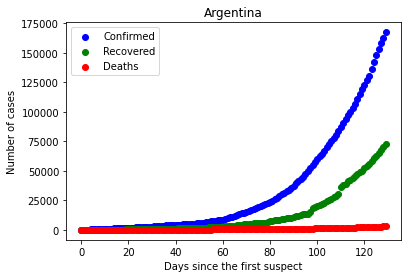

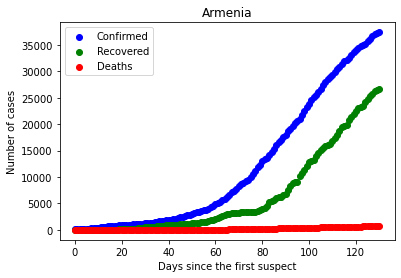

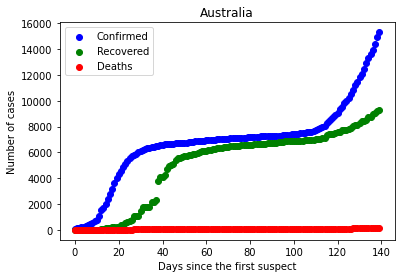

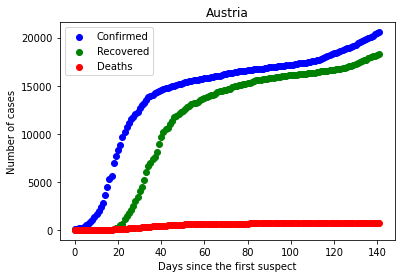

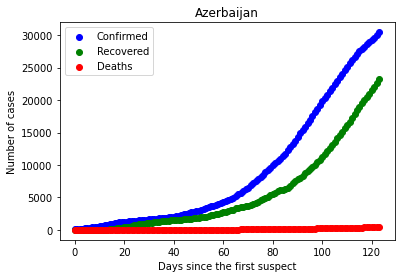

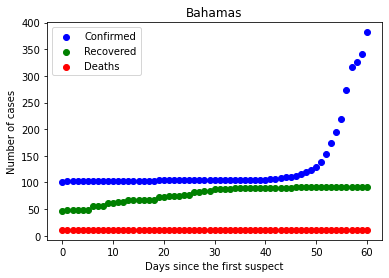

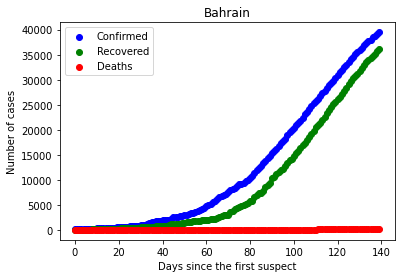

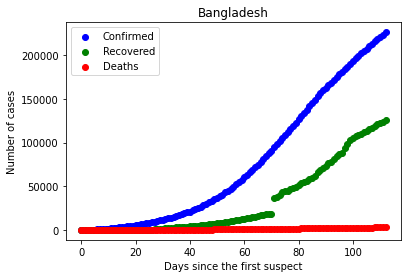

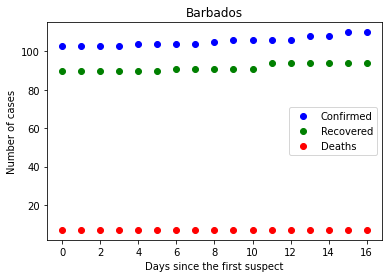

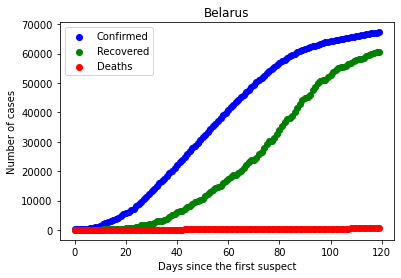

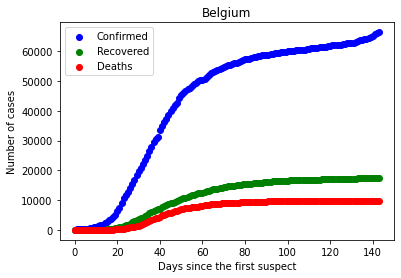

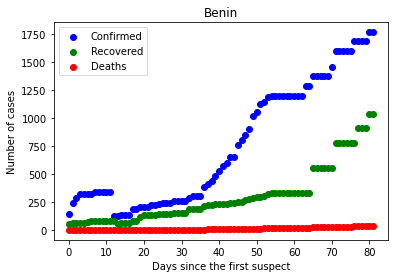

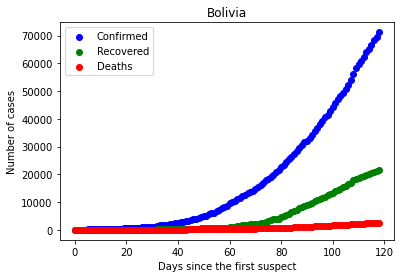

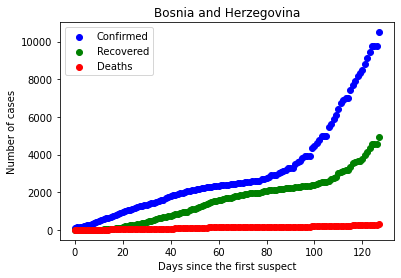

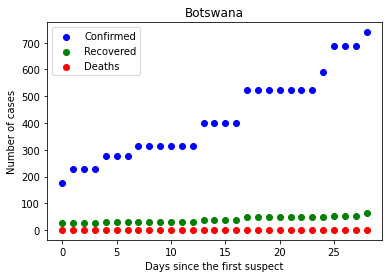

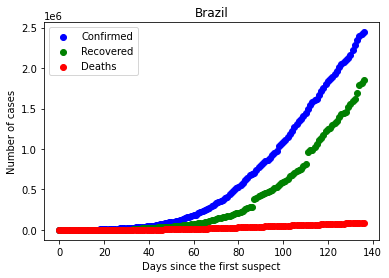

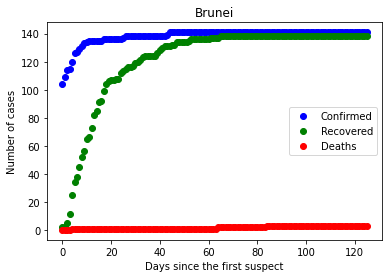

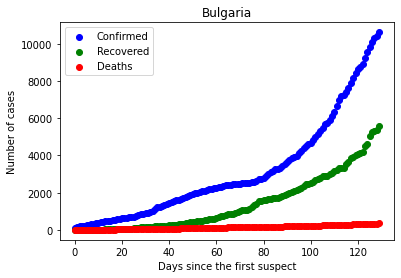

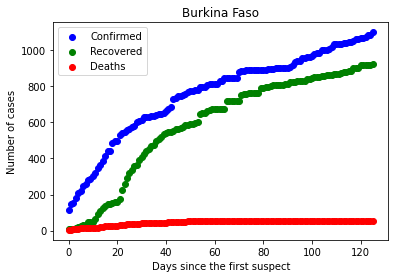

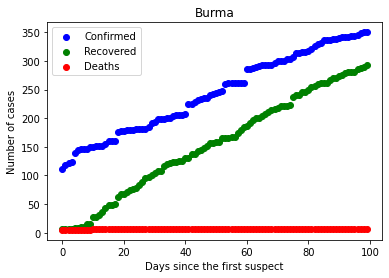

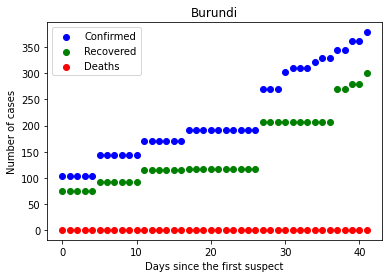

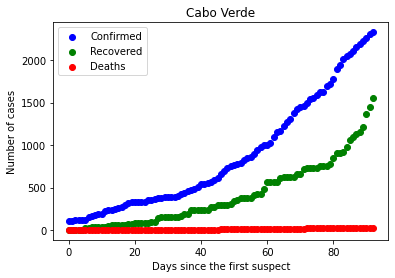

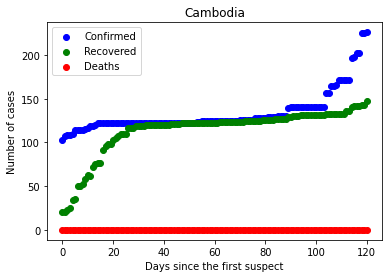

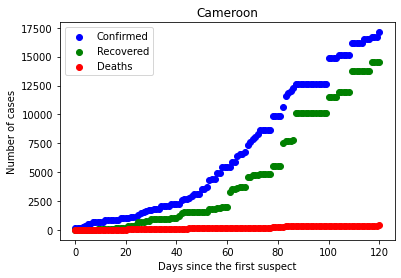

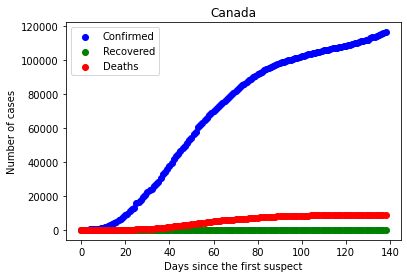

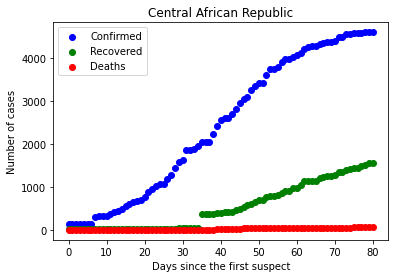

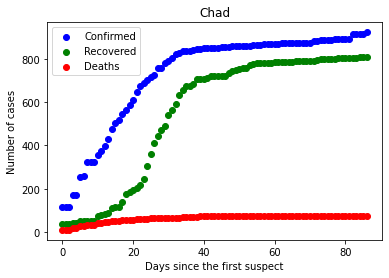

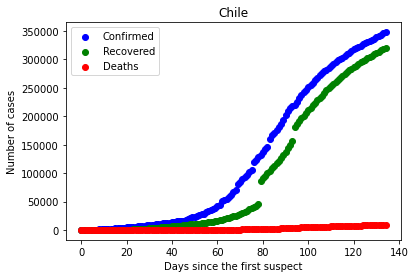

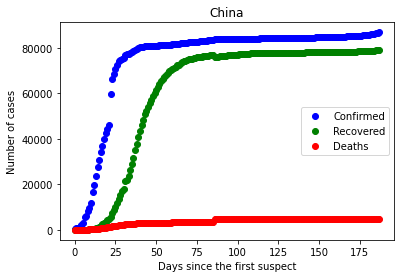

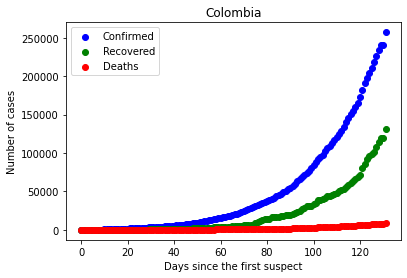

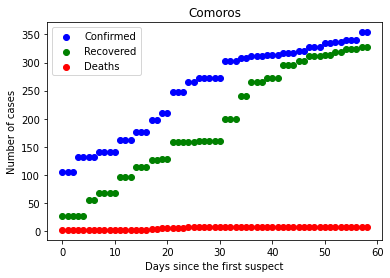

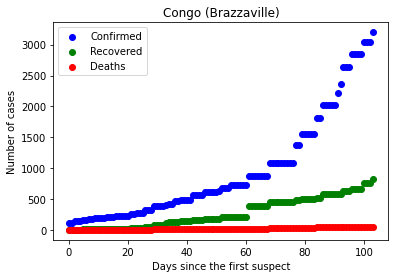

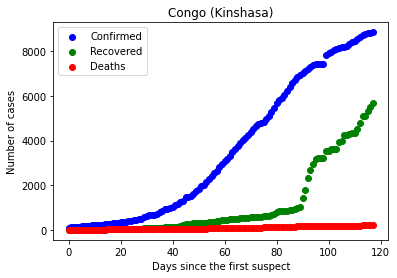

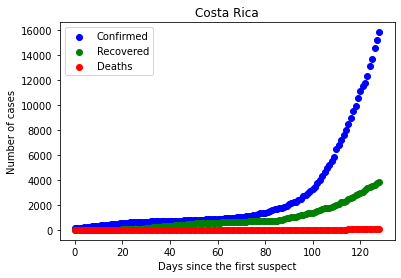

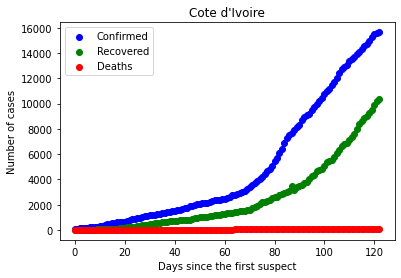

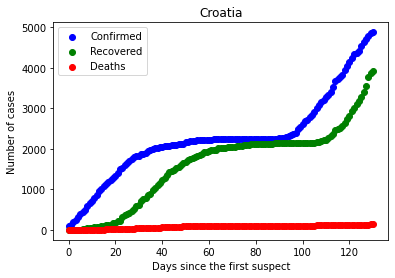

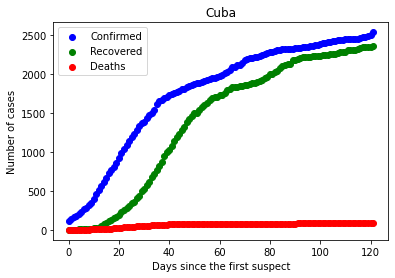

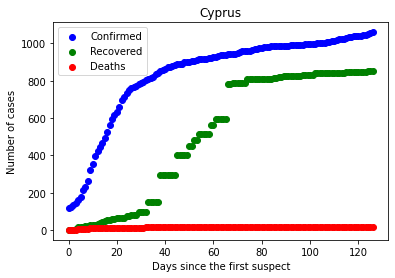

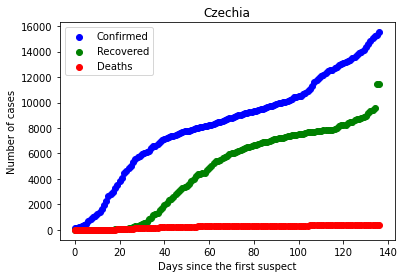

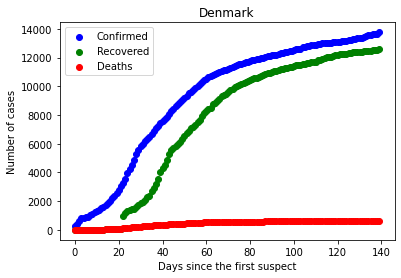

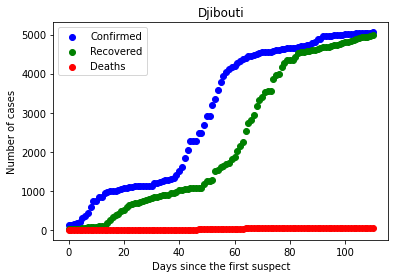

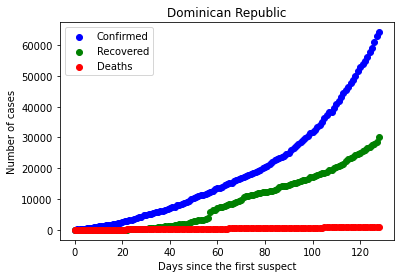

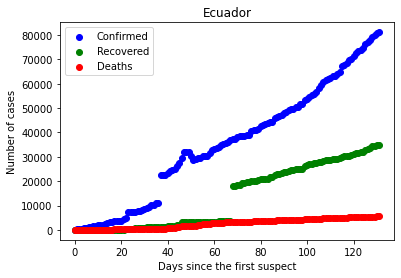

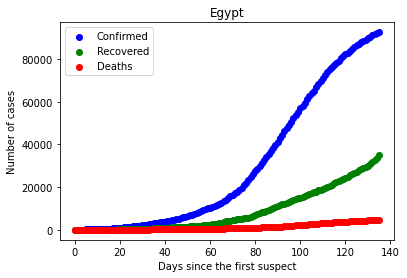

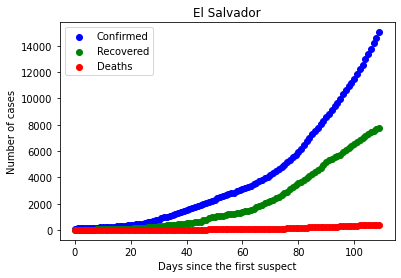

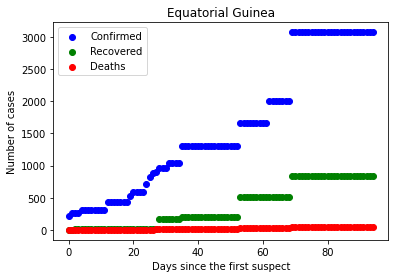

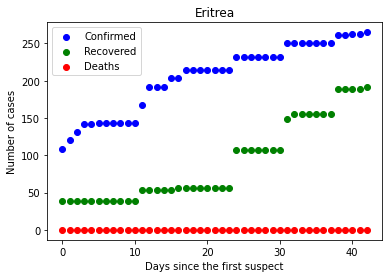

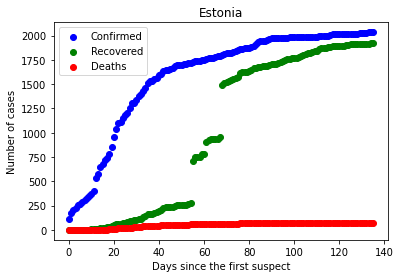

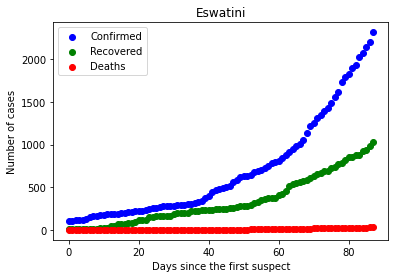

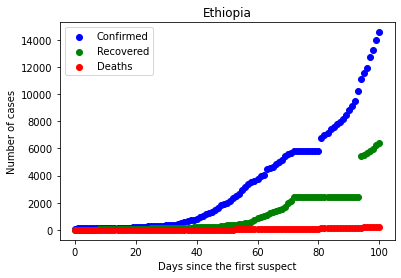

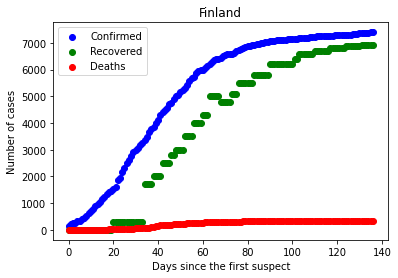

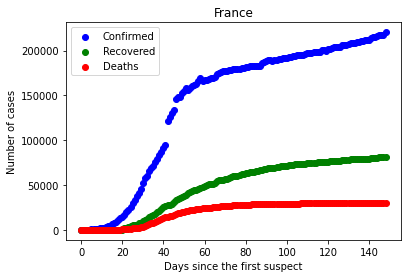

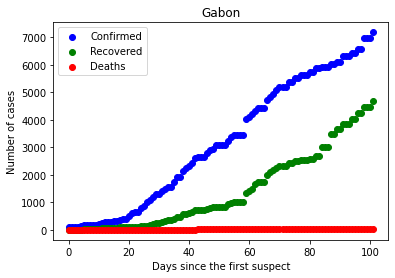

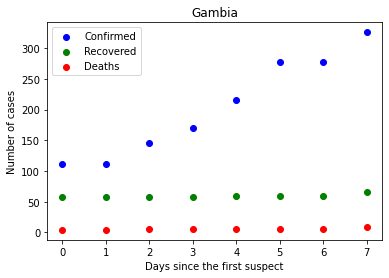

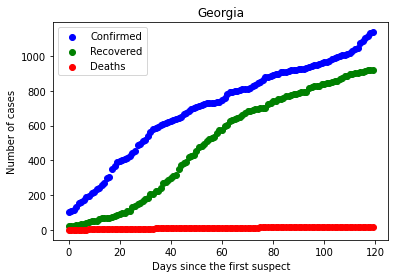

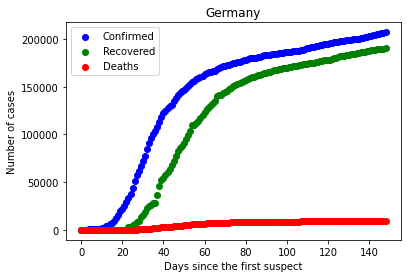

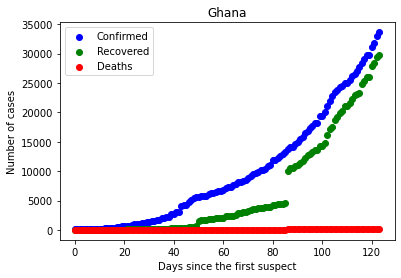

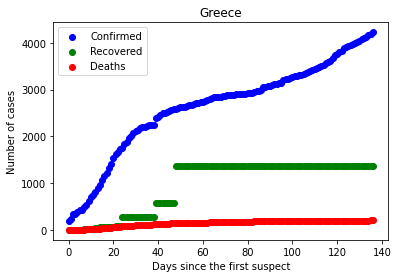

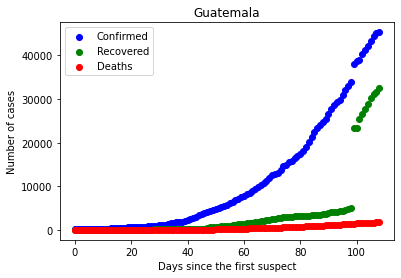

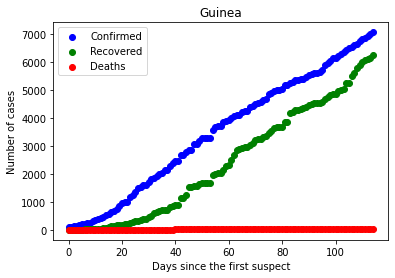

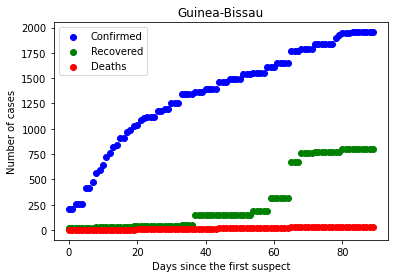

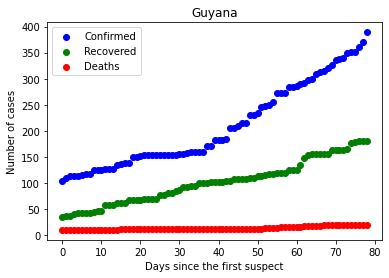

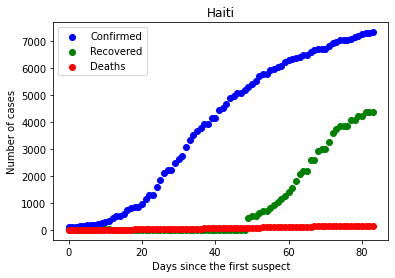

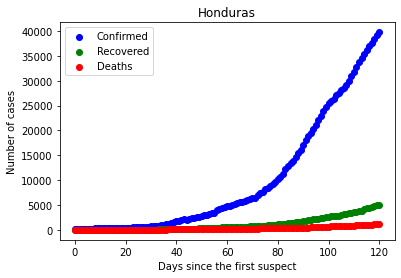

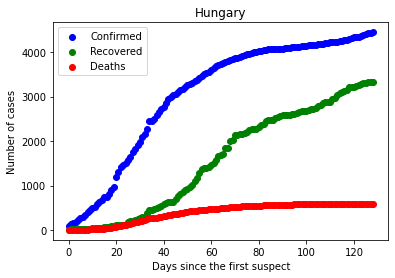

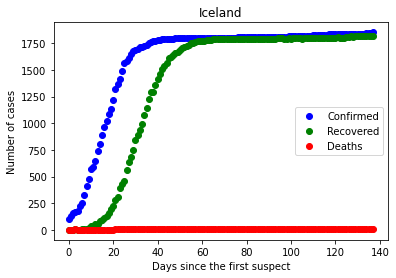

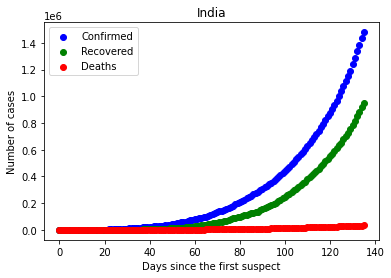

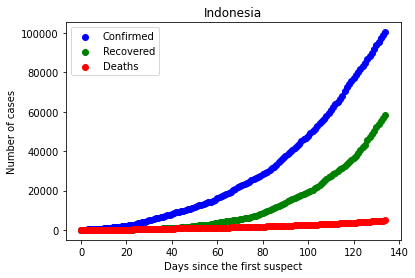

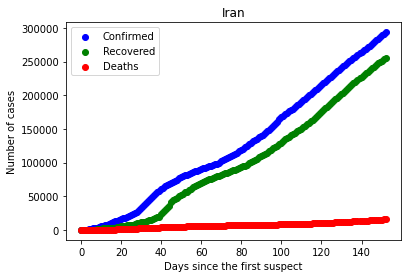

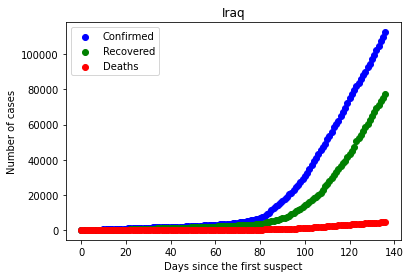

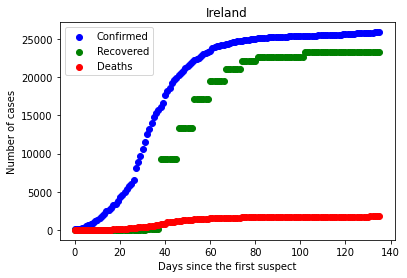

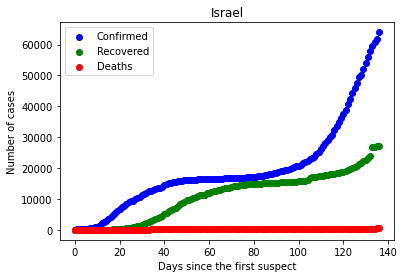

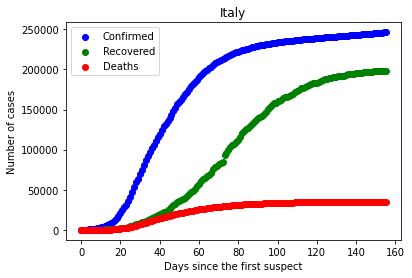

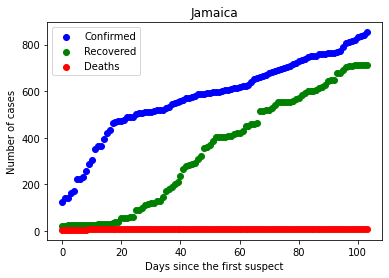

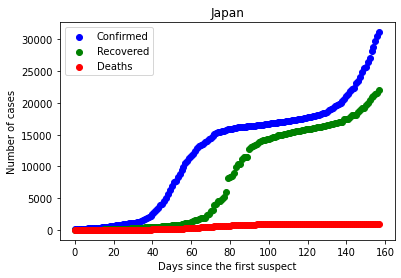

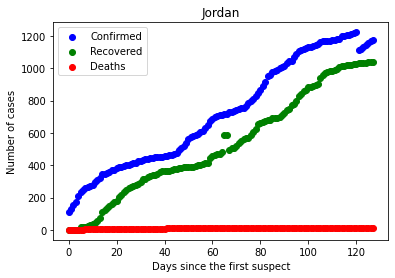

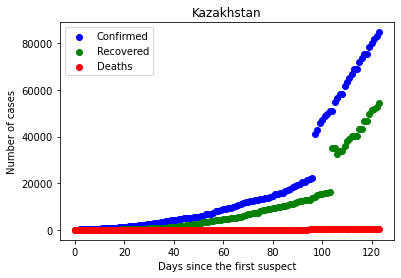

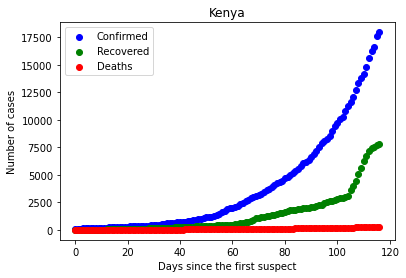

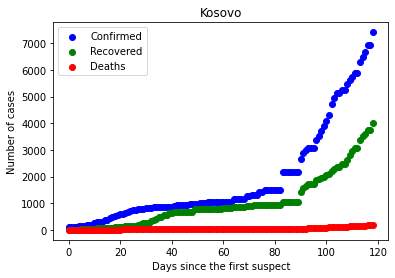

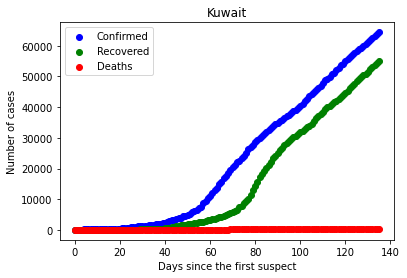

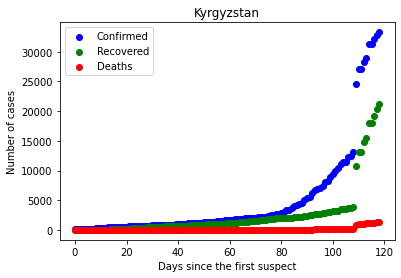

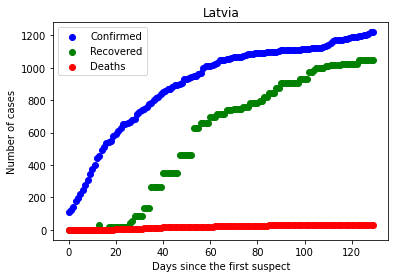

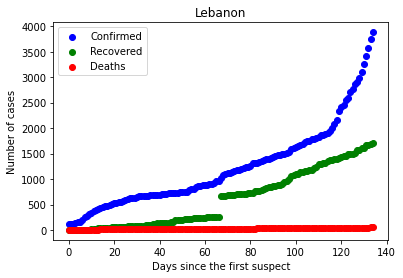

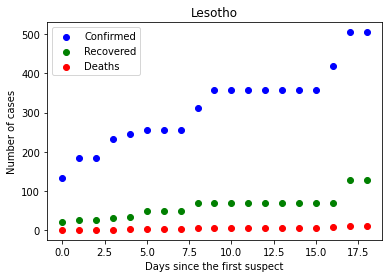

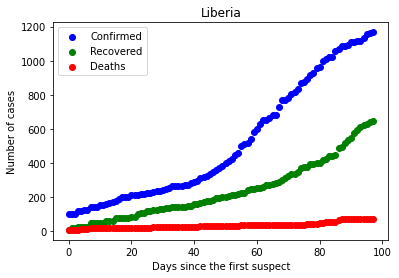

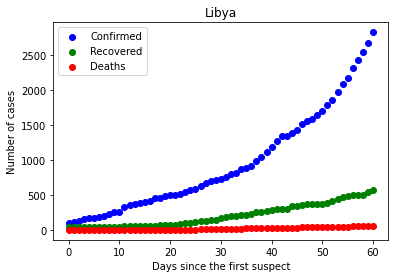

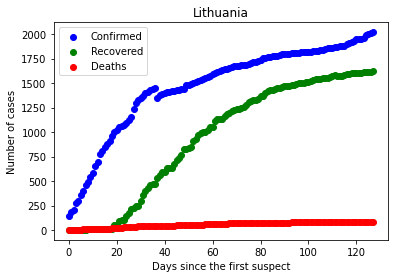

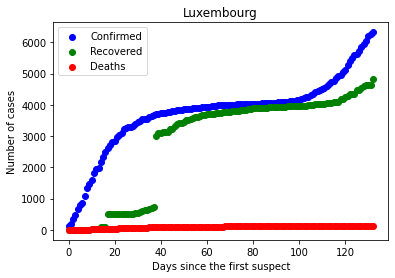

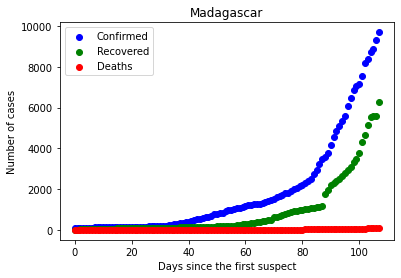

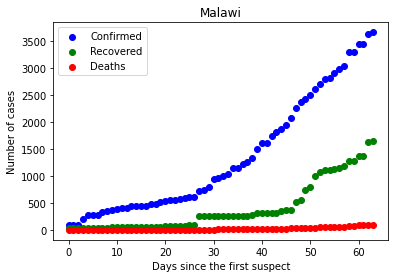

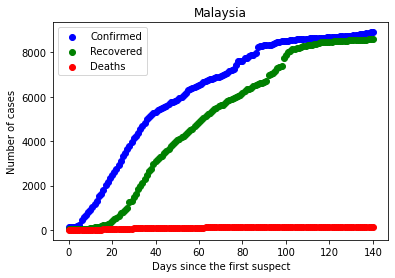

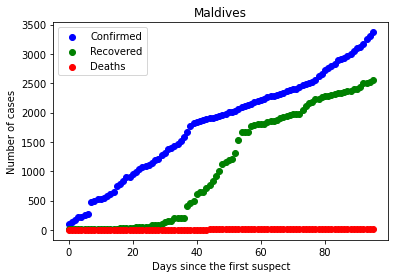

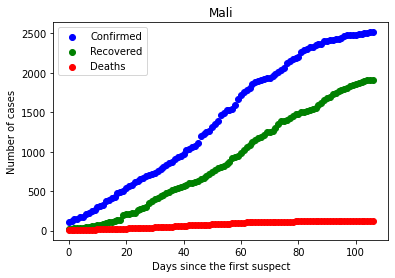

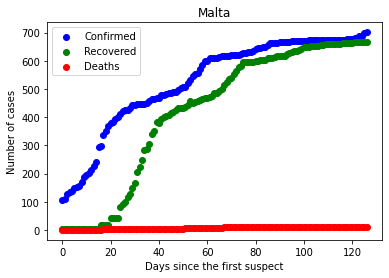

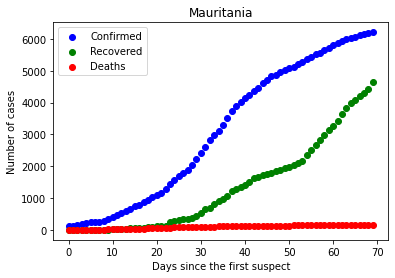

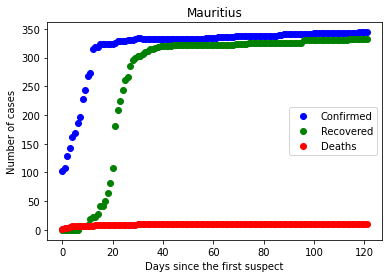

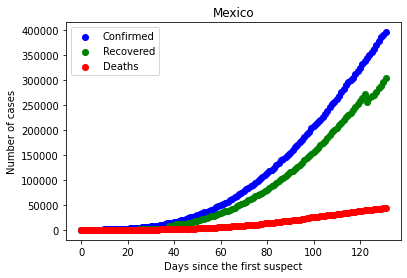

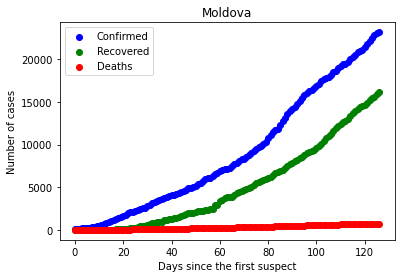

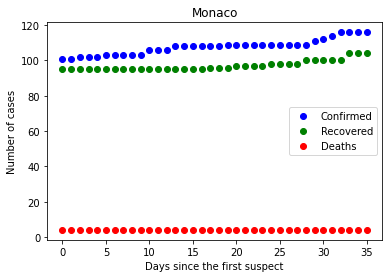

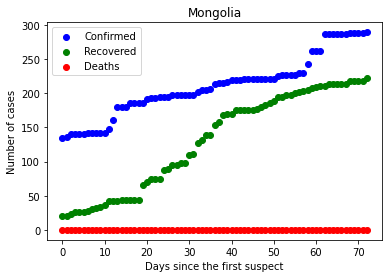

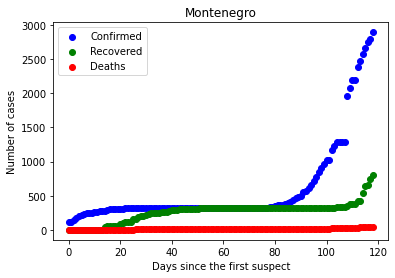

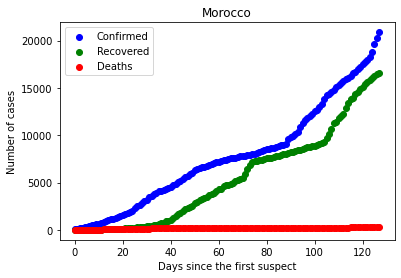

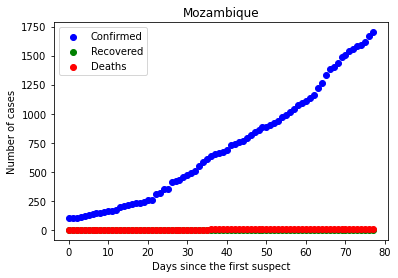

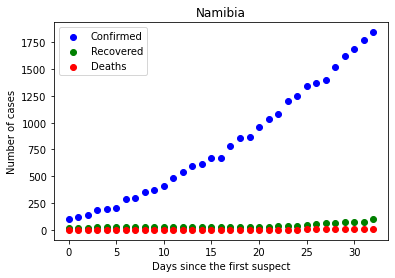

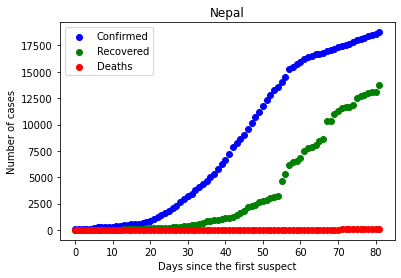

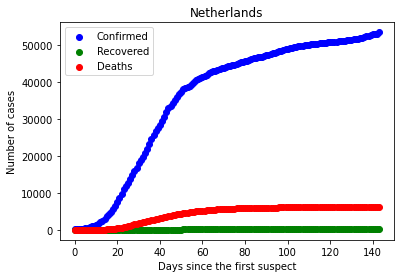

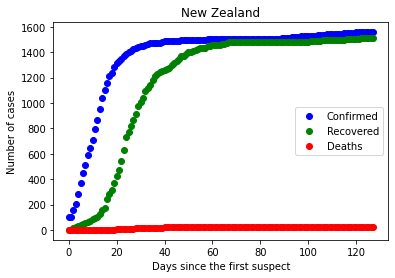

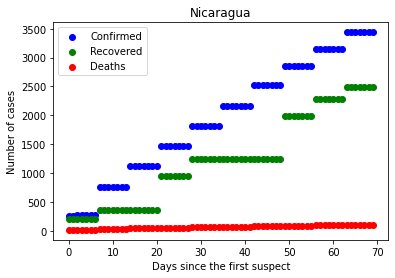

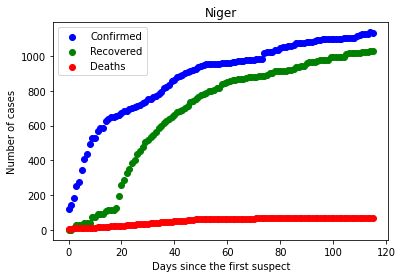

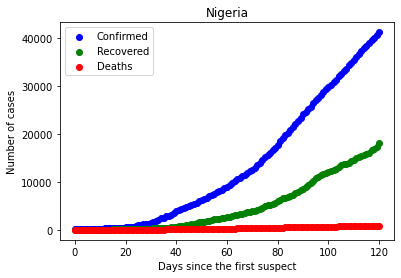

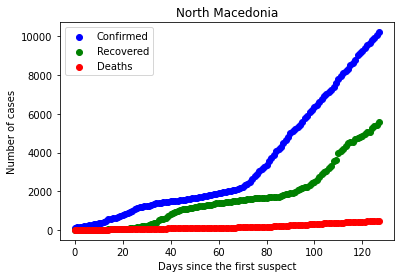

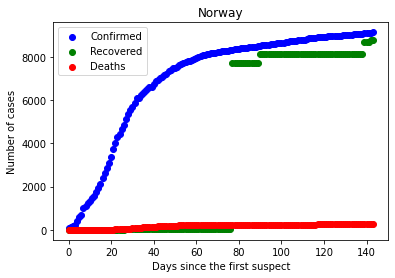

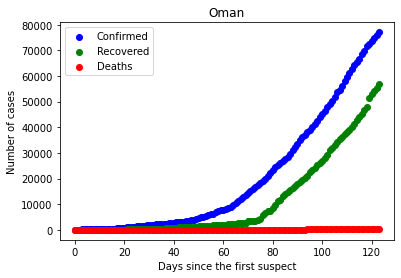

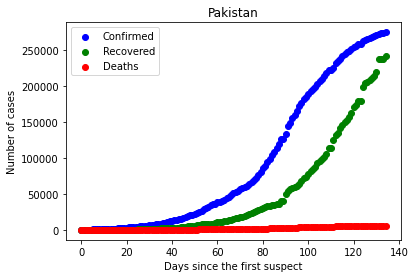

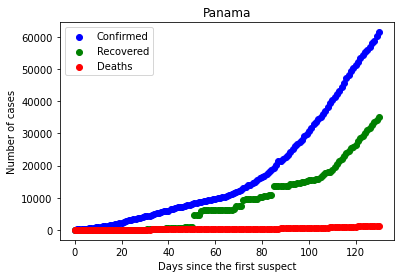

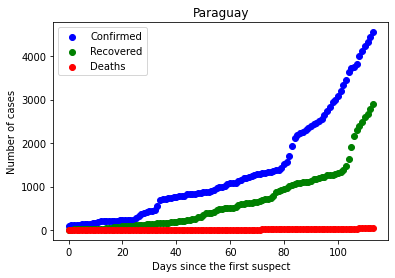

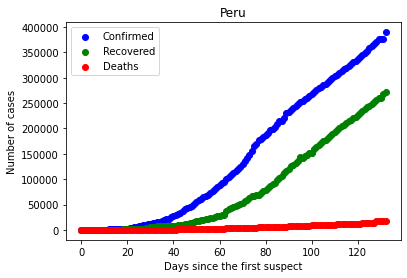

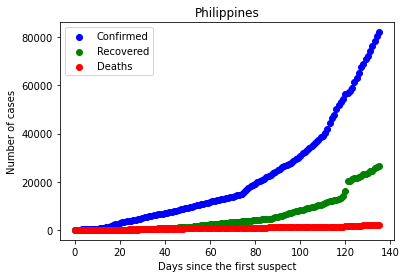

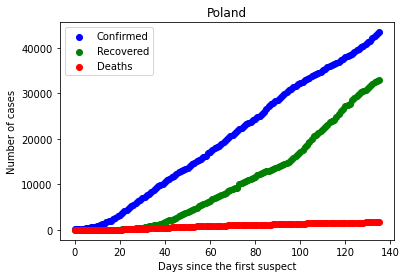

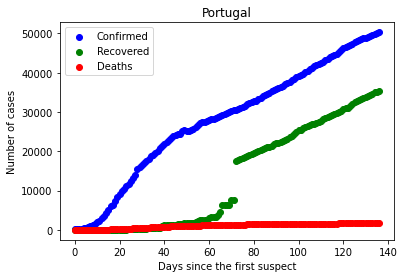

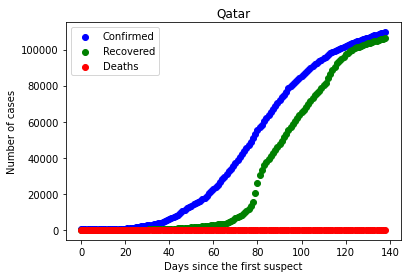

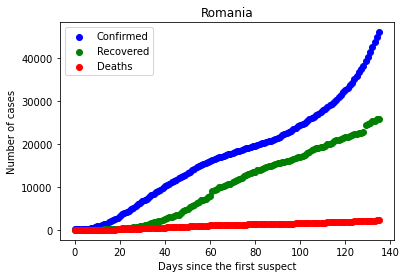

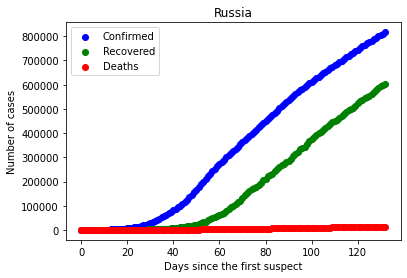

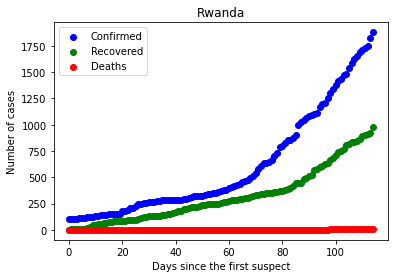

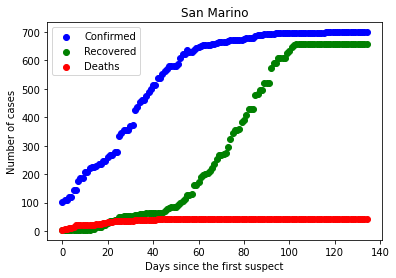

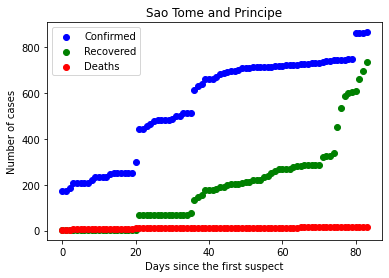

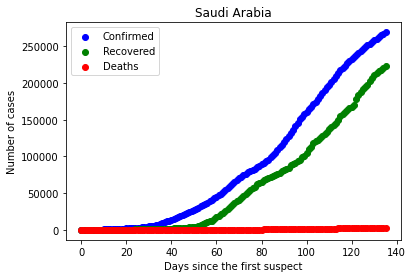

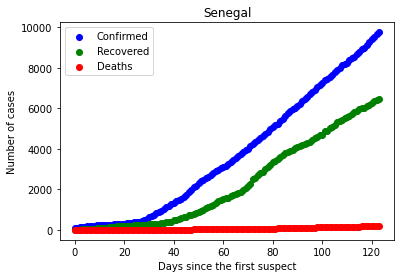

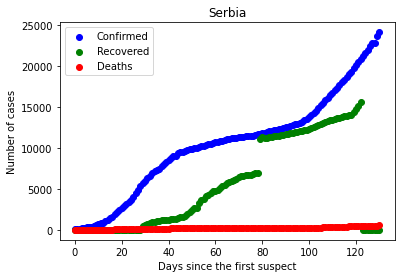

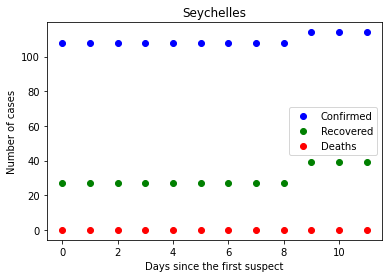

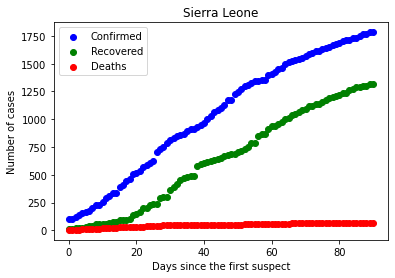

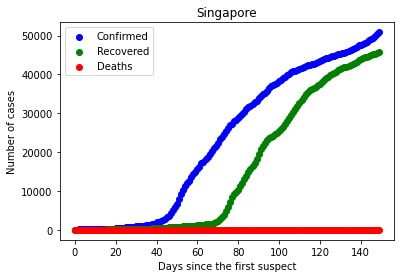

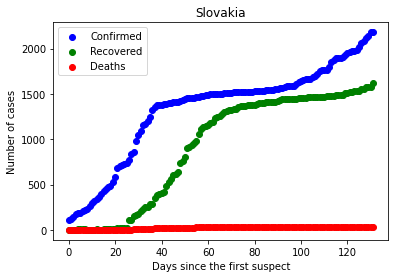

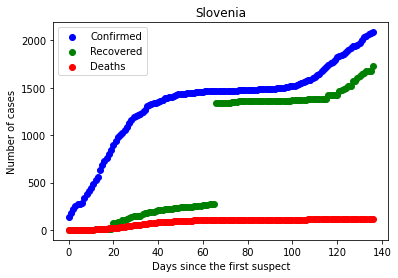

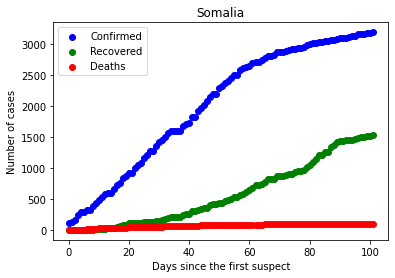

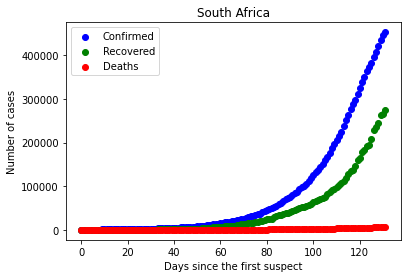

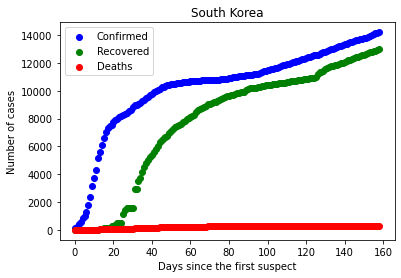

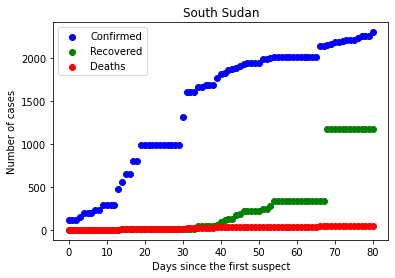

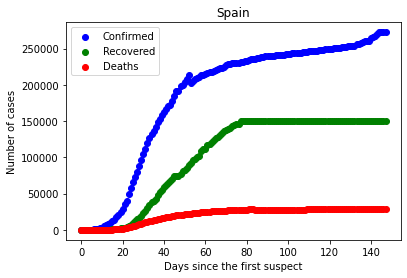

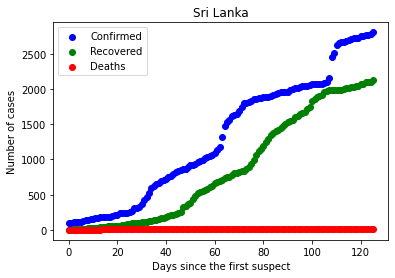

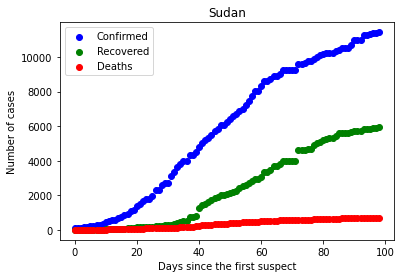

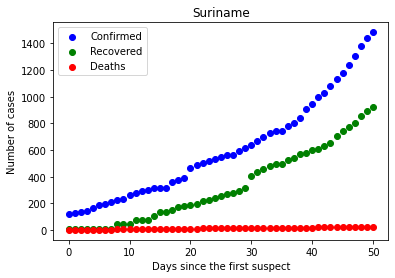

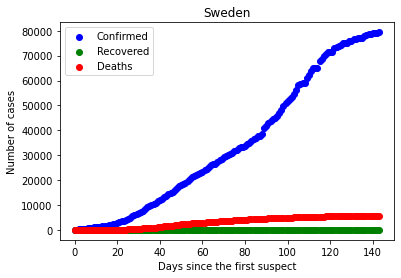

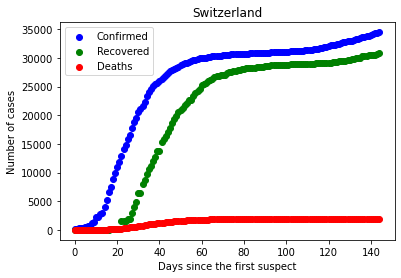

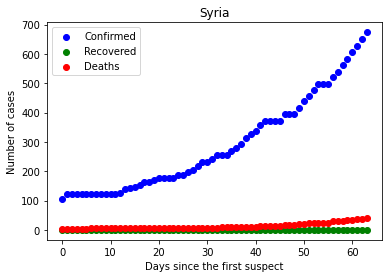

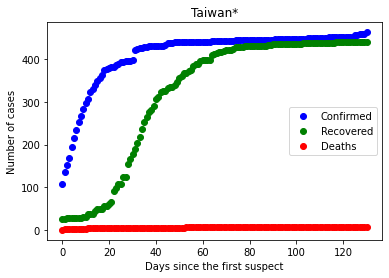

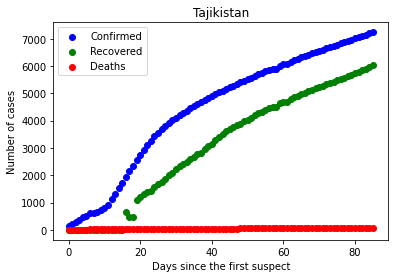

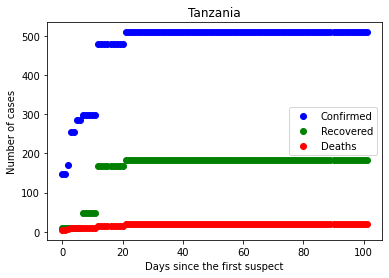

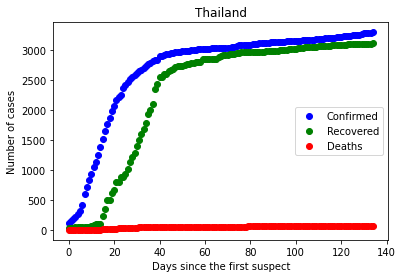

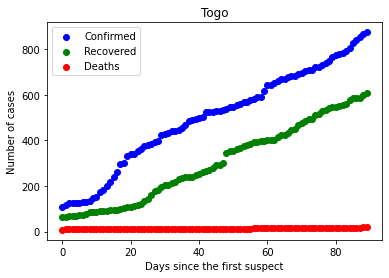

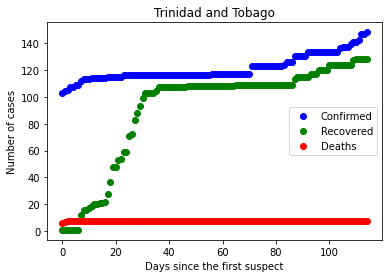

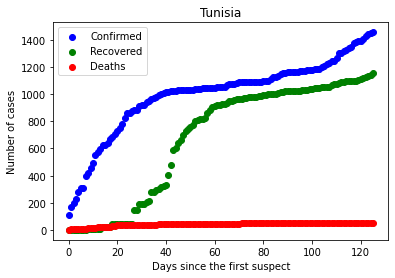

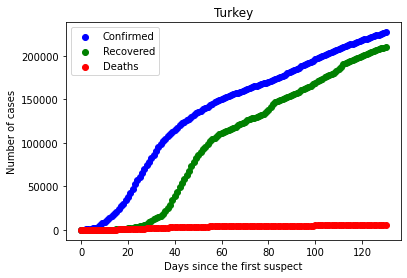

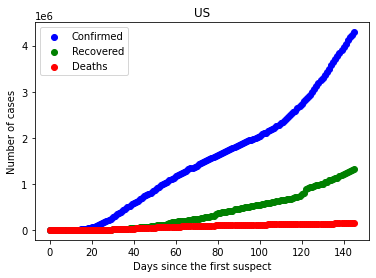

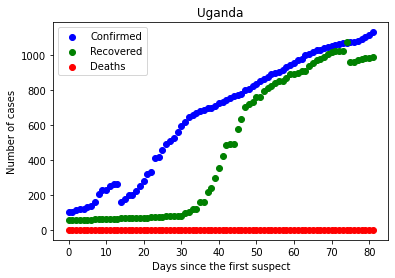

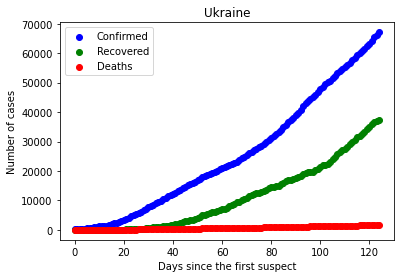

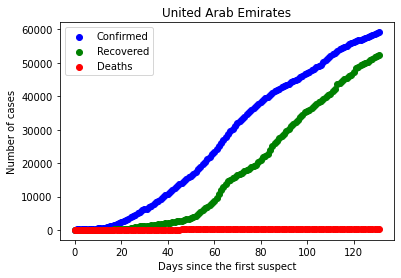

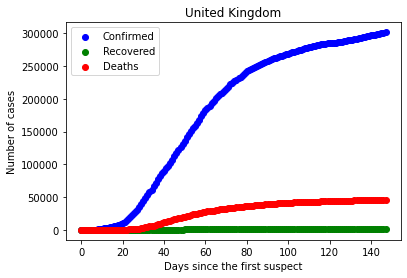

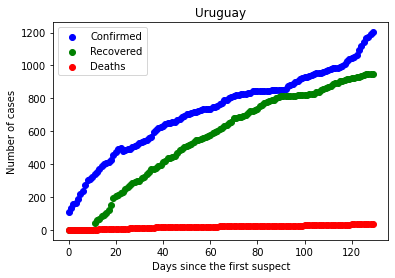

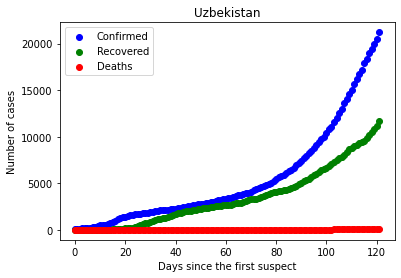

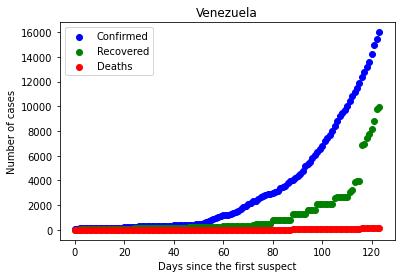

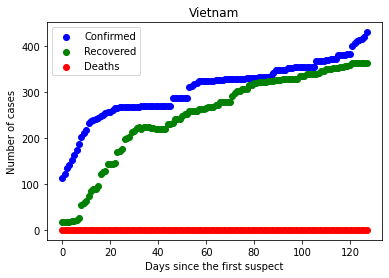

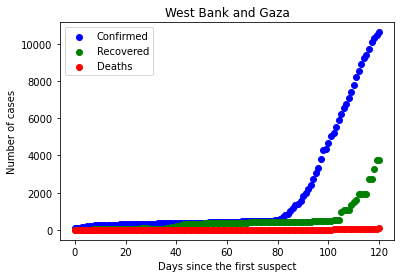

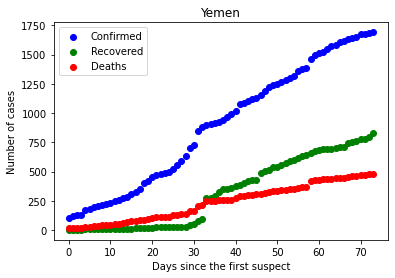

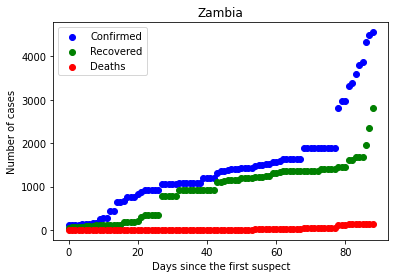

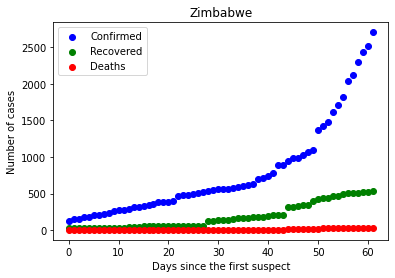

In [ ]:
for idx in range(0,len(countries)):
  C = df3[df3['Country']==countries[idx]].reset_index()
  plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
  plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
  plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
  plt.title(countries[idx])
  plt.xlabel('Days since the first suspect')
  plt.ylabel('Number of cases')
  plt.legend()
  plt.show()


Here we are doing the same thing as above instead we dont want the data to be looped through each country because we want the world as a whole. So we store it in a different variable and use matplotlib to visualize the findings for the world as a whole!

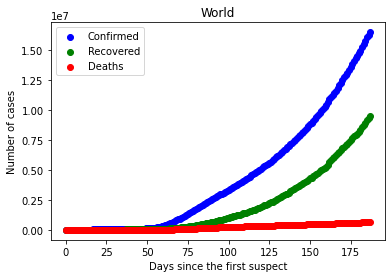

In [ ]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

**Insights**: 

1) The majority of countries have recovered from the covid-19 virus and have had a relatively low death toll.

2) Canada and the Netherlands have a higher total death toll than rcovered patients. 

3) Overall, the world has a extremely low death toll with many patients having recovered from the deadly virus. 